<a href="https://colab.research.google.com/github/PUNEET29GARG/IPL-Case-Study/blob/main/IPL_Case_study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
#Reading IPL_BALL_BY_BALL
by_ball=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/IPL Case study/IPL_Ball_by_Ball_2008_2022.csv")
##Reading IPL_MATCH
ipl_match=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/IPL Case study/IPL_Matches_2008_2022.csv")

In [ ]:
#few rows of ipl_match
ipl_match.head()

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
0,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,N,Gujarat Titans,Wickets,7.0,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon
1,1312199,Ahmedabad,2022-05-27,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,N,Rajasthan Royals,Wickets,7.0,NaN,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon
2,1312198,Kolkata,2022-05-25,2022,Eliminator,Royal Challengers Bangalore,Lucknow Super Giants,"Eden Gardens, Kolkata",Lucknow Super Giants,field,N,Royal Challengers Bangalore,Runs,14.0,NaN,RM Patidar,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['Q de Kock', 'KL Rahul', 'M Vohra', 'DJ Hooda...",J Madanagopal,MA Gough
3,1312197,Kolkata,2022-05-24,2022,Qualifier 1,Rajasthan Royals,Gujarat Titans,"Eden Gardens, Kolkata",Gujarat Titans,field,N,Gujarat Titans,Wickets,7.0,NaN,DA Miller,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",BNJ Oxenford,VK Sharma
4,1304116,Mumbai,2022-05-22,2022,70,Sunrisers Hyderabad,Punjab Kings,"Wankhede Stadium, Mumbai",Sunrisers Hyderabad,bat,N,Punjab Kings,Wickets,5.0,NaN,Harpreet Brar,"['PK Garg', 'Abhishek Sharma', 'RA Tripathi', ...","['JM Bairstow', 'S Dhawan', 'M Shahrukh Khan',...",AK Chaudhary,NA Patwardhan


**data-wrangling**

In [ ]:
ipl_match.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 950 entries, 0 to 949
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               950 non-null    int64  
 1   City             899 non-null    object 
 2   Date             950 non-null    object 
 3   Season           950 non-null    object 
 4   MatchNumber      950 non-null    object 
 5   Team1            950 non-null    object 
 6   Team2            950 non-null    object 
 7   Venue            950 non-null    object 
 8   TossWinner       950 non-null    object 
 9   TossDecision     950 non-null    object 
 10  SuperOver        946 non-null    object 
 11  WinningTeam      946 non-null    object 
 12  WonBy            950 non-null    object 
 13  Margin           932 non-null    float64
 14  method           19 non-null     object 
 15  Player_of_Match  946 non-null    object 
 16  Team1Players     950 non-null    object 
 17  Team2Players    

In [ ]:
#check for missing values
ipl_match.isnull().sum()

ID                   0
City                51
Date                 0
Season               0
MatchNumber          0
Team1                0
Team2                0
Venue                0
TossWinner           0
TossDecision         0
SuperOver            4
WinningTeam          4
WonBy                0
Margin              18
method             931
Player_of_Match      4
Team1Players         0
Team2Players         0
Umpire1              0
Umpire2              0
dtype: int64

**#OBSERVATION:**


*   Missing values col : <br>
City                51<br>
SuperOver            4<br>
WinningTeam          4<br>
Margin              18<br>
method             931<br>
Player_of_Match      4<br>





In [ ]:
#checking data set for missing values
missing_values=ipl_match[ipl_match.isnull().any(axis=1)]
missing_values

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
0,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,N,Gujarat Titans,Wickets,7.0,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon
1,1312199,Ahmedabad,2022-05-27,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,N,Rajasthan Royals,Wickets,7.0,NaN,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon
2,1312198,Kolkata,2022-05-25,2022,Eliminator,Royal Challengers Bangalore,Lucknow Super Giants,"Eden Gardens, Kolkata",Lucknow Super Giants,field,N,Royal Challengers Bangalore,Runs,14.0,NaN,RM Patidar,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['Q de Kock', 'KL Rahul', 'M Vohra', 'DJ Hooda...",J Madanagopal,MA Gough
3,1312197,Kolkata,2022-05-24,2022,Qualifier 1,Rajasthan Royals,Gujarat Titans,"Eden Gardens, Kolkata",Gujarat Titans,field,N,Gujarat Titans,Wickets,7.0,NaN,DA Miller,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",BNJ Oxenford,VK Sharma
4,1304116,Mumbai,2022-05-22,2022,70,Sunrisers Hyderabad,Punjab Kings,"Wankhede Stadium, Mumbai",Sunrisers Hyderabad,bat,N,Punjab Kings,Wickets,5.0,NaN,Harpreet Brar,"['PK Garg', 'Abhishek Sharma', 'RA Tripathi', ...","['JM Bairstow', 'S Dhawan', 'M Shahrukh Khan',...",AK Chaudhary,NA Patwardhan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
945,335986,Kolkata,2008-04-20,2007/08,4,Kolkata Knight Riders,Deccan Chargers,Eden Gardens,Deccan Chargers,bat,N,Kolkata Knight Riders,Wickets,5.0,NaN,DJ Hussey,"['WP Saha', 'BB McCullum', 'RT Ponting', 'SC G...","['AC Gilchrist', 'Y Venugopal Rao', 'VVS Laxma...",BF Bowden,K Hariharan
946,335985,Mumbai,2008-04-20,2007/08,5,Mumbai Indians,Royal Challengers Bangalore,Wankhede Stadium,Mumbai Indians,bat,N,Royal Challengers Bangalore,Wickets,5.0,NaN,MV Boucher,"['L Ronchi', 'ST Jayasuriya', 'DJ Thornely', '...","['S Chanderpaul', 'R Dravid', 'LRPL Taylor', '...",SJ Davis,DJ Harper
947,335984,Delhi,2008-04-19,2007/08,3,Delhi Daredevils,Rajasthan Royals,Feroz Shah Kotla,Rajasthan Royals,bat,N,Delhi Daredevils,Wickets,9.0,NaN,MF Maharoof,"['G Gambhir', 'V Sehwag', 'S Dhawan', 'MK Tiwa...","['T Kohli', 'YK Pathan', 'SR Watson', 'M Kaif'...",Aleem Dar,GA Pratapkumar
948,335983,Chandigarh,2008-04-19,2007/08,2,Kings XI Punjab,Chennai Super Kings,"Punjab Cricket Association Stadium, Mohali",Chennai Super Kings,bat,N,Chennai Super Kings,Runs,33.0,NaN,MEK Hussey,"['K Goel', 'JR Hopes', 'KC Sangakkara', 'Yuvra...","['PA Patel', 'ML Hayden', 'MEK Hussey', 'MS Dh...",MR Benson,SL Shastri


#OBSERVATION:
Margin colum makes sense with  wonBy col ---> wonBy this much margin

In [ ]:
ipl_match[ipl_match["Margin"].isnull()]

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
114,1254077,Chennai,2021-04-25,2021,20,Delhi Capitals,Sunrisers Hyderabad,"MA Chidambaram Stadium, Chepauk, Chennai",Delhi Capitals,bat,Y,Delhi Capitals,SuperOver,NaN,NaN,PP Shaw,"['PP Shaw', 'S Dhawan', 'RR Pant', 'SPD Smith'...","['DA Warner', 'JM Bairstow', 'KS Williamson', ...",CB Gaffaney,KN Ananthapadmanabhan
158,1216512,Abu Dhabi,2020-10-18,2020/21,35,Kolkata Knight Riders,Sunrisers Hyderabad,Sheikh Zayed Stadium,Sunrisers Hyderabad,field,Y,Kolkata Knight Riders,SuperOver,NaN,NaN,LH Ferguson,"['Shubman Gill', 'RA Tripathi', 'N Rana', 'AD ...","['JM Bairstow', 'KS Williamson', 'PK Garg', 'D...",PG Pathak,S Ravi
159,1216517,NaN,2020-10-18,2020/21,36,Mumbai Indians,Kings XI Punjab,Dubai International Cricket Stadium,Mumbai Indians,bat,Y,Kings XI Punjab,SuperOver,NaN,NaN,KL Rahul,"['RG Sharma', 'Q de Kock', 'SA Yadav', 'Ishan ...","['KL Rahul', 'MA Agarwal', 'CH Gayle', 'N Poor...",Nitin Menon,PR Reiffel
184,1216547,NaN,2020-09-28,2020/21,10,Royal Challengers Bangalore,Mumbai Indians,Dubai International Cricket Stadium,Mumbai Indians,field,Y,Royal Challengers Bangalore,SuperOver,NaN,NaN,AB de Villiers,"['D Padikkal', 'AJ Finch', 'V Kohli', 'AB de V...","['RG Sharma', 'Q de Kock', 'SA Yadav', 'Ishan ...",Nitin Menon,PR Reiffel
192,1216493,NaN,2020-09-20,2020/21,2,Delhi Capitals,Kings XI Punjab,Dubai International Cricket Stadium,Kings XI Punjab,field,Y,Delhi Capitals,SuperOver,NaN,NaN,MP Stoinis,"['PP Shaw', 'S Dhawan', 'SO Hetmyer', 'SS Iyer...","['KL Rahul', 'MA Agarwal', 'KK Nair', 'N Poora...",AK Chaudhary,Nitin Menon
203,1178426,Mumbai,2019-05-02,2019,51,Mumbai Indians,Sunrisers Hyderabad,Wankhede Stadium,Mumbai Indians,bat,Y,Mumbai Indians,SuperOver,NaN,NaN,JJ Bumrah,"['RG Sharma', 'Q de Kock', 'SA Yadav', 'E Lewi...","['WP Saha', 'MJ Guptill', 'MK Pandey', 'KS Wil...",CK Nandan,S Ravi
205,1178424,Bengaluru,2019-04-30,2019,49,Royal Challengers Bangalore,Rajasthan Royals,M.Chinnaswamy Stadium,Rajasthan Royals,field,NaN,NaN,NoResults,NaN,NaN,NaN,"['V Kohli', 'AB de Villiers', 'MP Stoinis', 'H...","['SV Samson', 'LS Livingstone', 'AM Rahane', '...",NJ Llong,UV Gandhe
244,1175365,Delhi,2019-03-30,2019,10,Kolkata Knight Riders,Delhi Capitals,Arun Jaitley Stadium,Delhi Capitals,field,Y,Delhi Capitals,SuperOver,NaN,NaN,PP Shaw,"['NS Naik', 'CA Lynn', 'RV Uthappa', 'N Rana',...","['PP Shaw', 'S Dhawan', 'SS Iyer', 'RR Pant', ...",AY Dandekar,Nitin Menon
339,1082625,Rajkot,2017-04-29,2017,35,Gujarat Lions,Mumbai Indians,Saurashtra Cricket Association Stadium,Gujarat Lions,bat,Y,Mumbai Indians,SuperOver,NaN,NaN,KH Pandya,"['Ishan Kishan', 'BB McCullum', 'SK Raina', 'A...","['PA Patel', 'JC Buttler', 'N Rana', 'RG Sharm...",AK Chaudhary,CB Gaffaney
437,829813,Bangalore,2015-05-17,2015,55,Royal Challengers Bangalore,Delhi Daredevils,M Chinnaswamy Stadium,Royal Challengers Bangalore,field,NaN,NaN,NoResults,NaN,NaN,NaN,"['V Kohli', 'CH Gayle', 'AB de Villiers', 'Man...","['Q de Kock', 'SS Iyer', 'JP Duminy', 'Yuvraj ...",HDPK Dharmasena,K Srinivasan


**#OBSERVATION: MARGIN IS MISSING IN 2 CASES when wonBy is 1) SUPER-OVER AND 2)noResults**
<br> let's verify our observation

In [ ]:
#checking wonBy col values to verify our observation
ipl_match["WonBy"].value_counts()

Wickets      509
Runs         423
SuperOver     14
NoResults      4
Name: WonBy, dtype: int64

**#OBSERVATION Verified:**  we have 18 missing values in Margin and in above block we can see <br>
SuperOver  appears   14 times<br>
NoResults   appears   4 times<br>
that is total 18 times so whenever there is noResults or team wonby superover there is no margin because than there is no margin as per rules of cricket<br>

so Margin's missing values are justified

#From our earlier observation we know
Missing values col :<br>
SuperOver 4<br>
WinningTeam 4<br>
Player_of_Match 4<br>

these col have same missing value, so let's tryfind if there is any relation among them

In [ ]:
#checking missing values of above mentioned columns
missing_values[missing_values["SuperOver"].isnull()]

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
205,1178424,Bengaluru,2019-04-30,2019,49,Royal Challengers Bangalore,Rajasthan Royals,M.Chinnaswamy Stadium,Rajasthan Royals,field,NaN,NaN,NoResults,NaN,NaN,NaN,"['V Kohli', 'AB de Villiers', 'MP Stoinis', 'H...","['SV Samson', 'LS Livingstone', 'AM Rahane', '...",NJ Llong,UV Gandhe
437,829813,Bangalore,2015-05-17,2015,55,Royal Challengers Bangalore,Delhi Daredevils,M Chinnaswamy Stadium,Royal Challengers Bangalore,field,NaN,NaN,NoResults,NaN,NaN,NaN,"['V Kohli', 'CH Gayle', 'AB de Villiers', 'Man...","['Q de Kock', 'SS Iyer', 'JP Duminy', 'Yuvraj ...",HDPK Dharmasena,K Srinivasan
464,829763,Bangalore,2015-04-29,2015,29,Royal Challengers Bangalore,Rajasthan Royals,M Chinnaswamy Stadium,Rajasthan Royals,field,NaN,NaN,NoResults,NaN,NaN,NaN,"['CH Gayle', 'V Kohli', 'AB de Villiers', 'Man...","['AM Rahane', 'SR Watson', 'SPD Smith', 'KK Na...",JD Cloete,PG Pathak
708,501265,Delhi,2011-05-21,2011,68,Delhi Daredevils,Pune Warriors,Feroz Shah Kotla,Delhi Daredevils,bat,NaN,NaN,NoResults,NaN,NaN,NaN,"['NV Ojha', 'DA Warner', 'MS Wade', 'CA Ingram...","['MK Pandey', 'JP Faulkner', 'SC Ganguly', 'RV...",SS Hazare,RJ Tucker


**#observation : whenever there is NoResult of a match so there is no player of the match and no winning team so it justified missing values of WinningTeam and Player_of_Match 4 and superover being Nan  is also justified as we don't know whether match's result is NoResult if it get's abondaned or for some reason it does not happened so no super over**

In [ ]:
#checking for method col why values are missing
#check for unique
ipl_match["method"].unique()

#so there is two method when d/l is used its mentioned and when its's not use its nan so justified

array([nan, 'D/L'], dtype=object)

**#why values are missing in cities let's  check**

In [ ]:
#we know venue and city has relation as venue is in city only
ipl_match[ipl_match["City"].isna()].Venue.unique()

#so missing cities are dubai and sharjah

array(['Dubai International Cricket Stadium', 'Sharjah Cricket Stadium'],
      dtype=object)

In [ ]:
#filling cities missing values
for i in range(len(ipl_match)):
  if pd.isna(ipl_match.loc[i]["City"]):
    v=ipl_match.loc[i]["Venue"].split(" ")[0]
    ipl_match.iat[i,1]=v
    print(ipl_match.loc[i]["City"])



Dubai
Dubai
Sharjah
Dubai
Dubai
Sharjah
Dubai
Dubai
Sharjah
Dubai
Dubai
Sharjah
Dubai
Dubai
Dubai
Dubai
Sharjah
Sharjah
Dubai
Dubai
Sharjah
Dubai
Dubai
Sharjah
Dubai
Dubai
Dubai
Sharjah
Sharjah
Dubai
Dubai
Dubai
Sharjah
Dubai
Dubai
Sharjah
Dubai
Dubai
Dubai
Dubai
Sharjah
Sharjah
Dubai
Dubai
Sharjah
Dubai
Sharjah
Sharjah
Dubai
Dubai
Sharjah


In [ ]:
#checking id if any more null values there
ipl_match[ipl_match["City"].isnull()]

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2


In [ ]:
#checking duplicates
ipl_match.duplicated().any()

False

NOW MOVING TO by_ball

In [ ]:
by_ball.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225954 entries, 0 to 225953
Data columns (total 17 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   ID                 225954 non-null  int64 
 1   innings            225954 non-null  int64 
 2   overs              225954 non-null  int64 
 3   ballnumber         225954 non-null  int64 
 4   batter             225954 non-null  object
 5   bowler             225954 non-null  object
 6   non-striker        225954 non-null  object
 7   extra_type         12049 non-null   object
 8   batsman_run        225954 non-null  int64 
 9   extras_run         225954 non-null  int64 
 10  total_run          225954 non-null  int64 
 11  non_boundary       225954 non-null  int64 
 12  isWicketDelivery   225954 non-null  int64 
 13  player_out         11151 non-null   object
 14  kind               11151 non-null   object
 15  fielders_involved  7988 non-null    object
 16  BattingTeam        2

In [ ]:
#check missing values
by_ball.isnull().sum()

ID                        0
innings                   0
overs                     0
ballnumber                0
batter                    0
bowler                    0
non-striker               0
extra_type           213905
batsman_run               0
extras_run                0
total_run                 0
non_boundary              0
isWicketDelivery          0
player_out           214803
kind                 214803
fielders_involved    217966
BattingTeam               0
dtype: int64

In [ ]:
#checking missing data
by_ball[by_ball.isnull().any(axis=1)].head(12)

,ID,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam
0,1312200,1,0,1,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
1,1312200,1,0,2,YBK Jaiswal,Mohammed Shami,JC Buttler,legbyes,0,1,1,0,0,NaN,NaN,NaN,Rajasthan Royals
2,1312200,1,0,3,JC Buttler,Mohammed Shami,YBK Jaiswal,NaN,1,0,1,0,0,NaN,NaN,NaN,Rajasthan Royals
3,1312200,1,0,4,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
4,1312200,1,0,5,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
5,1312200,1,0,6,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
6,1312200,1,1,1,JC Buttler,Yash Dayal,YBK Jaiswal,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
7,1312200,1,1,2,JC Buttler,Yash Dayal,YBK Jaiswal,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
8,1312200,1,1,3,JC Buttler,Yash Dayal,YBK Jaiswal,NaN,4,0,4,0,0,NaN,NaN,NaN,Rajasthan Royals
9,1312200,1,1,4,JC Buttler,Yash Dayal,YBK Jaiswal,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals


In [ ]:
#missing data info()
#extra_type     213905   player_out      214803  kind        214803 fielders_involved    217966

In [ ]:
#checking unique values:
by_ball["extra_type"].unique()

array([nan, 'legbyes', 'wides', 'byes', 'noballs', 'penalty'],
      dtype=object)

In [ ]:
by_ball["kind"].unique()

array([nan, 'caught', 'caught and bowled', 'run out', 'bowled', 'stumped',
       'lbw', 'hit wicket', 'retired hurt', 'retired out',
       'obstructing the field'], dtype=object)

**#observation : there is no imputation required as Nan is present where that column action does not happen for example: extras = nan when no extra happened**

In [ ]:
#check for duplicate
by_ball.duplicated().any()

False

**From overs 0-19, which over has the most runs scored in, on average?**

bi-variate plot

Text(0, 0.5, 'mean runs scored')

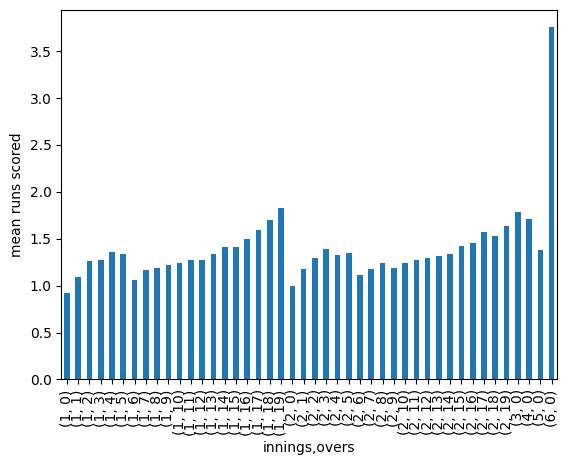

In [ ]:
by_ball.groupby(["innings","overs"])["total_run"].mean().plot(kind="bar")
plt.ylabel("mean runs scored")

it's clear from plot that 6th over has max mean runs scored in a particular order let's verify satistically also

In [ ]:
by_ball.groupby(["innings","overs"])["total_run"].mean()

innings  overs
1        0        0.918538
         1        1.095980
         2        1.257283
         3        1.273606
         4        1.353460
         5        1.336729
         6        1.061169
         7        1.167179
         8        1.192084
         9        1.221042
         10       1.245215
         11       1.268906
         12       1.271149
         13       1.337071
         14       1.412088
         15       1.413567
         16       1.500000
         17       1.587912
         18       1.697638
         19       1.824453
2        0        0.993622
         1        1.177536
         2        1.295982
         3        1.390194
         4        1.322147
         5        1.346596
         6        1.108411
         7        1.175487
         8        1.237353
         9        1.192093
         10       1.239313
         11       1.267841
         12       1.295422
         13       1.310903
         14       1.335235
         15       1.423273
         16  

In [ ]:
#total_run mean
by_ball.groupby(["innings","overs"])["total_run"].mean().nlargest(1)

innings  overs
6        0        3.75
Name: total_run, dtype: float64

2. Top 10 umpires, who were part of the most matches

In [ ]:
#combining both umpires
umpires=pd.concat([ipl_match["Umpire1"],ipl_match["Umpire2"]])
umpires.value_counts().nlargest(10)

S Ravi                   131
AK Chaudhary             111
HDPK Dharmasena           94
C Shamshuddin             88
Nitin Menon               83
CB Gaffaney               69
M Erasmus                 67
CK Nandan                 59
BNJ Oxenford              57
KN Ananthapadmanabhan     56
dtype: int64

Top 10 most successful bowlers in terms of number of wickets taken

In [ ]:

a=by_ball[by_ball["isWicketDelivery"]==1].groupby("bowler")["isWicketDelivery"].value_counts().nlargest(10)
a

bowler           isWicketDelivery
DJ Bravo         1                   207
SL Malinga       1                   188
A Mishra         1                   175
R Ashwin         1                   174
YS Chahal        1                   172
SP Narine        1                   171
B Kumar          1                   165
PP Chawla        1                   165
Harbhajan Singh  1                   161
JJ Bumrah        1                   161
Name: isWicketDelivery, dtype: int64

**Calculate for each team the number of playoff matches played.**

In [ ]:
# considering these as playoff: "Eliminator","Qualifier 1","Qualifier 2","Qualifier","Elimination Final","3rd Place Play-Off"

playoff=ipl_match[ipl_match["MatchNumber"].isin(["Eliminator","Qualifier 1","Qualifier 2","Qualifier","Elimination Final","3rd Place Play-Off"])]
#playoff

In [ ]:
#combining data of team 1 and team2 from playoff data set
playoff_subset=pd.concat([playoff["Team1"],playoff["Team2"]])
playoff_subset

1      Royal Challengers Bangalore
2      Royal Challengers Bangalore
3                 Rajasthan Royals
75                  Delhi Capitals
76     Royal Challengers Bangalore
                  ...             
631          Kolkata Knight Riders
703                 Mumbai Indians
704          Kolkata Knight Riders
705            Chennai Super Kings
776                Deccan Chargers
Length: 74, dtype: object

In [ ]:
# The number of playoff matches played by each team
playoff_subset.value_counts()

Chennai Super Kings            12
Mumbai Indians                 11
Royal Challengers Bangalore    10
Kolkata Knight Riders          10
Sunrisers Hyderabad             9
Rajasthan Royals                6
Delhi Capitals                  6
Gujarat Lions                   2
Kings XI Punjab                 2
Delhi Daredevils                2
Lucknow Super Giants            1
Gujarat Titans                  1
Rising Pune Supergiant          1
Deccan Chargers                 1
dtype: int64

** On which venue, the team batting second has the most advantage?**

In [ ]:
#merging both data set TossDecision
merged_df = pd.merge(ipl_match,by_ball, on='ID', how='inner')

In [ ]:
#teams batting_second data
batting_second=merged_df[merged_df["TossDecision"]=="field"]

In [ ]:
#checking where TossWinner batting second == WinnigTeam
batting_second.where(batting_second["TossWinner"]==batting_second["WinningTeam"])

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,...,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam
233,1312199.0,Ahmedabad,2022-05-27,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,...,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,Royal Challengers Bangalore
234,1312199.0,Ahmedabad,2022-05-27,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,...,NaN,1.0,0.0,1.0,0.0,0.0,NaN,NaN,NaN,Royal Challengers Bangalore
235,1312199.0,Ahmedabad,2022-05-27,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,...,NaN,1.0,0.0,1.0,0.0,0.0,NaN,NaN,NaN,Royal Challengers Bangalore
236,1312199.0,Ahmedabad,2022-05-27,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,...,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,Royal Challengers Bangalore
237,1312199.0,Ahmedabad,2022-05-27,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,...,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,Royal Challengers Bangalore
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225949,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
225950,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
225951,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
225952,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


At M Chinnaswamy Stadium teams has most advantage batting second

In [ ]:
batting_second["Venue"].value_counts().nlargest(1)

M Chinnaswamy Stadium    12985
Name: Venue, dtype: int64

**#Bar chart showing venues where no. of times team batting second has more advantage**

<Axes: >

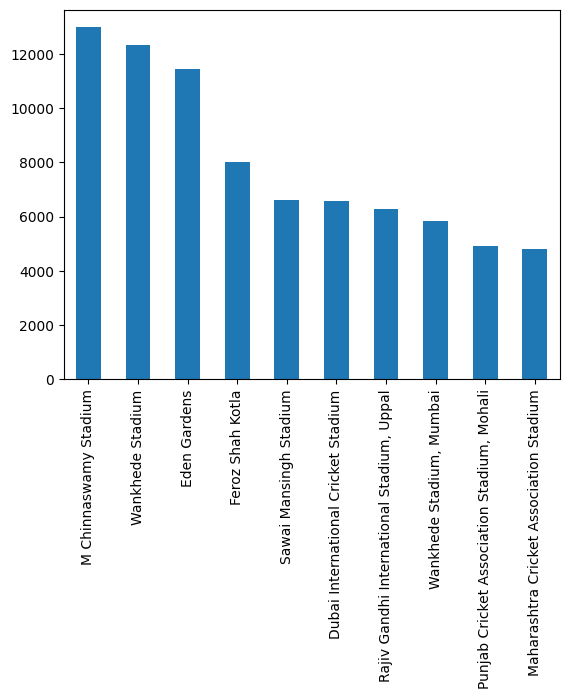

In [ ]:
batting_second["Venue"].value_counts().nlargest(10).plot(kind="bar")

** Which batsman in the history of IPL has been caught out the most?**

In [ ]:
#the batter which has been get caught the most
by_ball[by_ball["kind"]=="caught"]["batter"].value_counts().nlargest(1)

RG Sharma    135
Name: batter, dtype: int64

**Which bowler has taken the wicket of the batsman and it was a caught out?**

In [ ]:
#new data set where kind of out is caught
df=by_ball[by_ball["kind"]=="caught"]

below: List of bowlers taken RG Sharma wickect with kind == caught

In [ ]:
df[df["batter"]=="RG Sharma"]["bowler"]

1357               A Nortje
2370      Washington Sundar
3805        Simarjeet Singh
4459             TG Southee
7381               R Ashwin
                ...        
220015       M Muralitharan
221054        R Vinay Kumar
223937             SK Warne
224442             R Bhatia
224831             M Kartik
Name: bowler, Length: 135, dtype: object

Which team has the highest probability of winning a match given that they had won the
toss?

In [ ]:
# Filter the data where TossWinner is equal to WinningTeam
df_win=ipl_match.where(ipl_match["TossWinner"]==ipl_match["WinningTeam"])

In [ ]:
# Group the data by TossWinner and count the number of matches won
df_win_count = df_win.groupby('TossWinner')['ID'].count()
df_win_count

TossWinner
Chennai Super Kings            68
Deccan Chargers                19
Delhi Capitals                 21
Delhi Daredevils               35
Gujarat Lions                  10
Gujarat Titans                  7
Kings XI Punjab                36
Kochi Tuskers Kerala            4
Kolkata Knight Riders          64
Lucknow Super Giants            4
Mumbai Indians                 70
Pune Warriors                   3
Punjab Kings                    4
Rajasthan Royals               49
Rising Pune Supergiant          5
Rising Pune Supergiants         3
Royal Challengers Bangalore    53
Sunrisers Hyderabad            34
Name: ID, dtype: int64

In [ ]:
#counting total no. of matches  each teams have played after winning toss irrespective of winning a match
#NOTE: ipl_match["TossWinner"] contains data where teams had won the toss rirrespective of winning a match so its a total
#no. of matches played by a team after winning a toss
df_total_count=ipl_match["TossWinner"].value_counts()
df_total_count

Mumbai Indians                 123
Kolkata Knight Riders          114
Chennai Super Kings            109
Royal Challengers Bangalore    105
Rajasthan Royals                99
Kings XI Punjab                 85
Delhi Daredevils                80
Sunrisers Hyderabad             74
Deccan Chargers                 43
Delhi Capitals                  36
Pune Warriors                   20
Gujarat Lions                   15
Gujarat Titans                  10
Punjab Kings                     9
Kochi Tuskers Kerala             8
Lucknow Super Giants             7
Rising Pune Supergiants          7
Rising Pune Supergiant           6
Name: TossWinner, dtype: int64

In [ ]:
# Calculate the probability of winning a match given that they had won the toss
df_prob = df_win_count / df_total_count

In [ ]:
# Sort the probability in descending order
df_prob = df_prob.sort_values(ascending=False)
df_prob

Rising Pune Supergiant         0.833333
Gujarat Titans                 0.700000
Gujarat Lions                  0.666667
Chennai Super Kings            0.623853
Delhi Capitals                 0.583333
Lucknow Super Giants           0.571429
Mumbai Indians                 0.569106
Kolkata Knight Riders          0.561404
Royal Challengers Bangalore    0.504762
Kochi Tuskers Kerala           0.500000
Rajasthan Royals               0.494949
Sunrisers Hyderabad            0.459459
Punjab Kings                   0.444444
Deccan Chargers                0.441860
Delhi Daredevils               0.437500
Rising Pune Supergiants        0.428571
Kings XI Punjab                0.423529
Pune Warriors                  0.150000
dtype: float64

**#PIE CHART**

<Axes: >

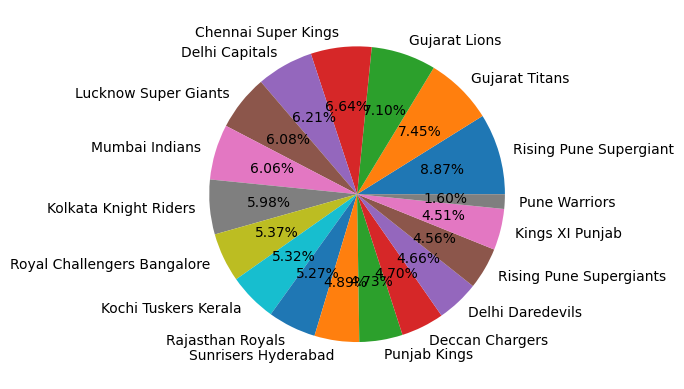

In [ ]:
df_prob.plot(kind="pie",autopct="%.2f%%")

**Therefore the highest probability of winning a match is of Rising Pune Supergiant         0.833333**

In [ ]:
df_prob.nlargest(1)

Rising Pune Supergiant    0.833333
dtype: float64